<a href="https://colab.research.google.com/github/venkatesh-eranti/Decision_Tree-Regressor/blob/main/Decision_Tree_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and understanding the data

## importing the required librariers

In [54]:
# load model
from sklearn.datasets import load_boston
# reading and processing the data
import numpy as np
import pandas as pd
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
# splitting the data in to train and test
from sklearn.model_selection import train_test_split
# rescaling the features
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# to build a model
from sklearn.tree import DecisionTreeRegressor
# evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Hyper parameters tuning
from sklearn.model_selection import GridSearchCV
# to build decision tree
from sklearn import tree

## loading the data

In [2]:
boston=load_boston()

In [3]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [4]:
df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['price']=boston['target']

In [5]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


# splitting the data in to train and test data

In [6]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=42)

In [7]:
df_train.shape,df_test.shape

((354, 14), (152, 14))

In [8]:
x_train=df_train.drop('price',axis=1)
y_train=df_train['price']

In [9]:
x_test=df_test.drop('price',axis=1)
y_test=df_test['price']

# building a Decision tree model to predict price

In [10]:
reg=DecisionTreeRegressor()

In [11]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
y_pred=reg.predict(x_test)

## evaluating the decision tree model with default parameters

In [13]:
r2_score(y_train,reg.predict(x_train))

1.0

In [14]:
r2_score(y_test,y_pred)

0.8540966464557392

In [15]:
mean_absolute_error(y_test,y_pred)

2.4

In [16]:
mean_squared_error(y_test,y_pred)

10.871710526315791

# Parameter tuning

## max_depth values

The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 10 and plot the training and test scores.

In [17]:
test_r2_score=[]
train_r2_score=[]
for i in range(1,11):
    reg=DecisionTreeRegressor(max_depth=i)
    reg.fit(x_train,y_train)
    test_r2_score.append(r2_score(y_test,reg.predict(x_test)))
    train_r2_score.append(r2_score(y_train,reg.predict(x_train)))
max_depth_df=pd.DataFrame({'max_depth':np.arange(1,11),'test_r2_score':test_r2_score,'train_r2_score':train_r2_score})
max_depth_df

,max_depth,test_r2_score,train_r2_score
0,1,0.415877,0.460598
1,2,0.675844,0.699541
2,3,0.772815,0.825158
3,4,0.807805,0.901856
4,5,0.850736,0.927720
5,6,0.860664,0.947891
6,7,0.754585,0.968814
7,8,0.748003,0.980040
8,9,0.863015,0.984857
9,10,0.761831,0.988624


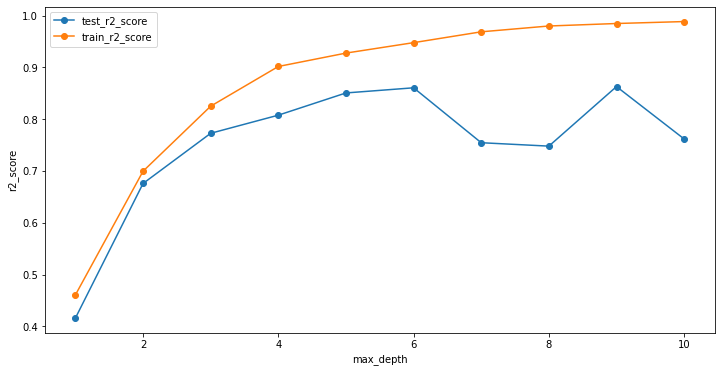

In [18]:
plt.figure(figsize=(12,6))
plt.plot(max_depth_df['max_depth'],max_depth_df['test_r2_score'],marker='o',label='test_r2_score')
plt.plot(max_depth_df['max_depth'],max_depth_df['train_r2_score'],marker='o',label='train_r2_score')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('r2_score')
plt.show()

seems overfitting as we increase max_depth values

## Min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

In [19]:
Min_samples_split_test_r2_score=[]
Min_samples_split_train_r2_score=[]
for i in np.linspace(0.1,1,10,endpoint=True):
    reg=DecisionTreeRegressor(min_samples_split=i)
    reg.fit(x_train,y_train)
    Min_samples_split_test_r2_score.append(r2_score(y_test,reg.predict(x_test)))
    Min_samples_split_train_r2_score.append(r2_score(y_train,reg.predict(x_train)))
Min_samples_split=pd.DataFrame({'Min_samples_split':np.linspace(0.1,1,10),'Min_samples_split_test_r2_score':Min_samples_split_test_r2_score,'Min_samples_split_train_r2_score':Min_samples_split_train_r2_score})
Min_samples_split

,Min_samples_split,Min_samples_split_test_r2_score,Min_samples_split_train_r2_score
0,0.1,0.869925,0.891677
1,0.2,0.723464,0.756768
2,0.3,0.718532,0.754344
3,0.4,0.699816,0.719542
4,0.5,0.662897,0.686594
5,0.6,0.600143,0.628569
6,0.7,0.600143,0.628569
7,0.8,0.600143,0.628569
8,0.9,0.415877,0.460598
9,1.0,0.415877,0.460598


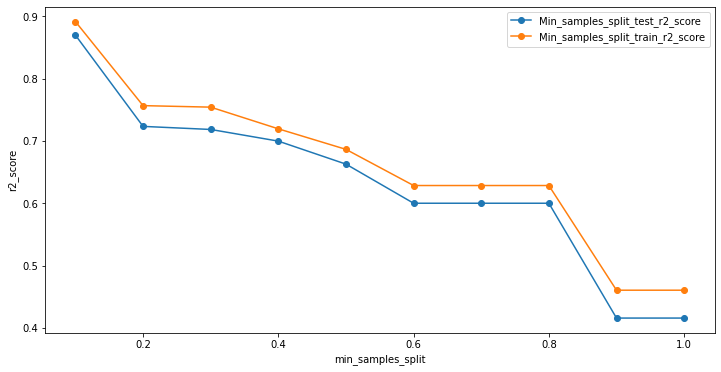

In [20]:
plt.figure(figsize=(12,6))
plt.plot(Min_samples_split['Min_samples_split'],Min_samples_split['Min_samples_split_test_r2_score'],marker='o',label='Min_samples_split_test_r2_score')
plt.plot(Min_samples_split['Min_samples_split'],Min_samples_split['Min_samples_split_train_r2_score'],marker='o',label='Min_samples_split_train_r2_score')
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('r2_score')
plt.show()

We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

## min_samples_leaf

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of sample of samples at the leafs, the base of the tree.

In [21]:
min_samples_leaf_test_r2_score=[]
min_samples_leaf_train_r2_score=[]
for i in np.linspace(0.1,0.5,5,endpoint=True):
    reg=DecisionTreeRegressor(min_samples_leaf=i)
    reg.fit(x_train,y_train)
    min_samples_leaf_test_r2_score.append(r2_score(y_test,reg.predict(x_test)))
    min_samples_leaf_train_r2_score.append(r2_score(y_train,reg.predict(x_train)))
min_samples_leaf=pd.DataFrame({'min_samples_leaf':np.linspace(0.1,0.5,5),'min_samples_leaf_test_r2_score':min_samples_leaf_test_r2_score,'min_samples_leaf_train_r2_score':min_samples_leaf_train_r2_score})
min_samples_leaf

,min_samples_leaf,min_samples_leaf_test_r2_score,min_samples_leaf_train_r2_score
0,0.1,0.636292,0.697961
1,0.2,0.460633,0.573435
2,0.3,0.456175,0.560894
3,0.4,0.426522,0.441041
4,0.5,0.404605,0.395958


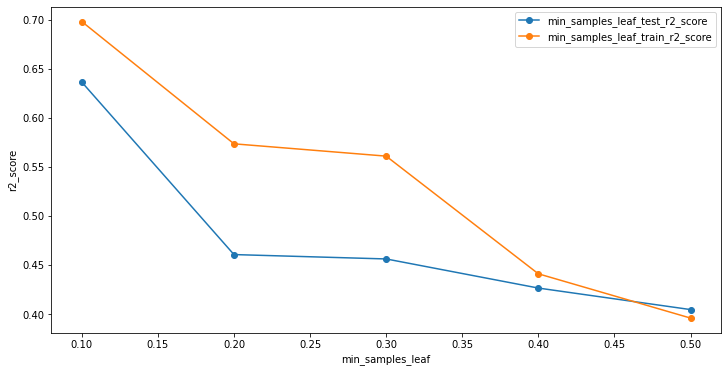

In [22]:
plt.figure(figsize=(12,6))
plt.plot(min_samples_leaf['min_samples_leaf'],min_samples_leaf['min_samples_leaf_test_r2_score'],marker='o',label='min_samples_leaf_test_r2_score')
plt.plot(min_samples_leaf['min_samples_leaf'],min_samples_leaf['min_samples_leaf_train_r2_score'],marker='o',label='min_samples_leaf_train_r2_score')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('r2_score')
plt.show()

Same conclusion as to previous parameter. Increasing this value may cause underfitting

## max_features

max_features represents the number of features to consider when looking for the best split.

In [36]:
max_features_test_r2_score=[]
max_features_train_r2_score=[]
for i in list(range(1,df_test.shape[1])):
    reg=DecisionTreeRegressor(max_features=i)
    reg.fit(x_train,y_train)
    max_features_test_r2_score.append(r2_score(y_test,reg.predict(x_test)))
    max_features_train_r2_score.append(r2_score(y_train,reg.predict(x_train)))
max_features=pd.DataFrame({'max_features':list(range(1,df_test.shape[1])),'max_features_test_r2_score':max_features_test_r2_score,'max_features_train_r2_score':max_features_train_r2_score})
max_features

,max_features,max_features_test_r2_score,max_features_train_r2_score
0,1,0.652226,1.0
1,2,0.823181,1.0
2,3,0.780826,1.0
3,4,0.739907,1.0
4,5,0.735734,1.0
5,6,0.737408,1.0
6,7,0.623306,1.0
7,8,0.741964,1.0
8,9,0.768702,1.0
9,10,0.840364,1.0


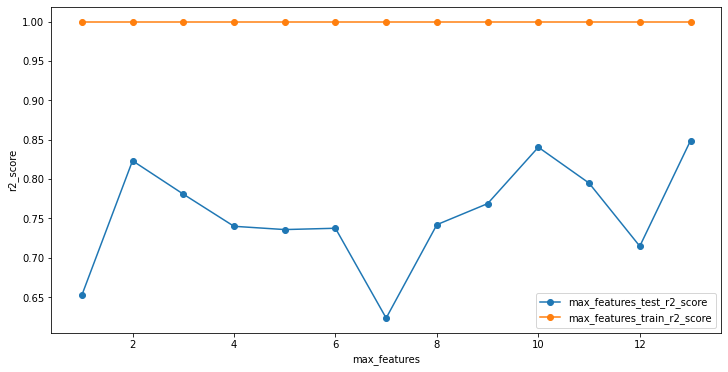

In [37]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,14),max_features['max_features_test_r2_score'],marker='o',label='max_features_test_r2_score')
plt.plot(np.arange(1,14),max_features['max_features_train_r2_score'],marker='o',label='max_features_train_r2_score')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('r2_score')
plt.show()

This is an overfitting case. It’s unexpected to get overfitting for all values of max_features. However, according to sklearn documentation for decision tree, the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

## max_leaf_nodes

grow a tree with `max_leaf_nodes` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

In [25]:
max_leaf_nodes_test_r2_score=[]
max_leaf_nodes_train_r2_score=[]
for i in np.arange(1,110,10):
    reg=DecisionTreeRegressor(min_samples_leaf=i)
    reg.fit(x_train,y_train)
    max_leaf_nodes_test_r2_score.append(r2_score(y_test,reg.predict(x_test)))
    max_leaf_nodes_train_r2_score.append(r2_score(y_train,reg.predict(x_train)))
max_leaf_nodes=pd.DataFrame({'min_samples_leaf':np.arange(1,110,10),'max_leaf_nodes_test_r2_score':max_leaf_nodes_test_r2_score,'max_leaf_nodes_train_r2_score':max_leaf_nodes_train_r2_score})
max_leaf_nodes

,min_samples_leaf,max_leaf_nodes_test_r2_score,max_leaf_nodes_train_r2_score
0,1,0.742467,1.000000
1,11,0.775821,0.846935
2,21,0.733421,0.802271
3,31,0.670980,0.740476
4,41,0.636375,0.697622
5,51,0.638840,0.693541
6,61,0.613965,0.657800
7,71,0.460633,0.573435
8,81,0.438622,0.563356
9,91,0.438622,0.563356


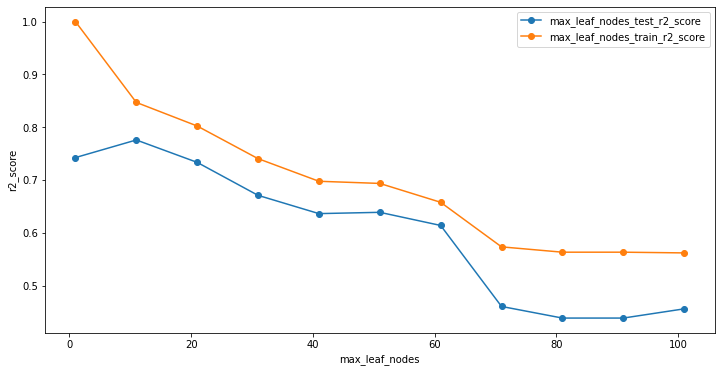

In [26]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,110,10),max_leaf_nodes['max_leaf_nodes_test_r2_score'],marker='o',label='max_leaf_nodes_test_r2_score')
plt.plot(np.arange(1,110,10),max_leaf_nodes['max_leaf_nodes_train_r2_score'],marker='o',label='max_leaf_nodes_train_r2_score')
plt.legend()
plt.xlabel('max_leaf_nodes')
plt.ylabel('r2_score')
plt.show()

max_leaf_nodes are also an underfitting case

# finding best parameters by using GridsearchCV

In [39]:
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
grid={'max_depth':np.arange(1,11),'min_samples_split':np.linspace(0.1,1,10),'min_samples_leaf':np.linspace(0.1,0.5,5),
      'max_features':list(range(1,df_test.shape[1])),'min_samples_leaf':np.arange(1,110,10)}
gs_reg=GridSearchCV(estimator=reg,param_grid=grid,verbose=0)
gs_reg.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8,

In [40]:
gs_reg.best_params_

{'max_depth': 6,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1}

In [48]:
reg_final=DecisionTreeRegressor(max_depth= 6,max_features= 9,min_samples_leaf= 1,min_samples_split= 0.1)
reg_final.fit(x_train,y_train)
y_pred=reg_final.predict(x_test)
print('final train_r2_score:',r2_score(y_train,reg_final.predict(x_train)))
print('final test_r2_score:',r2_score(y_test,y_pred))
print('Mean_absolute_error:',mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))

final train_r2_score: 0.8183315814676226
final test_r2_score: 0.7900122591920931
Mean_absolute_error: 2.8743167042409388
mean_squared_error: 15.646836598900064


As the difference between $r^2$ value of test and train is less than 5% and MAE and MSE are also less than original default parameters. <br> we can conclude these are the best parameters to fit decision tree regressor

# Building Decision Tree

## via grpahviz

In [65]:
import graphviz

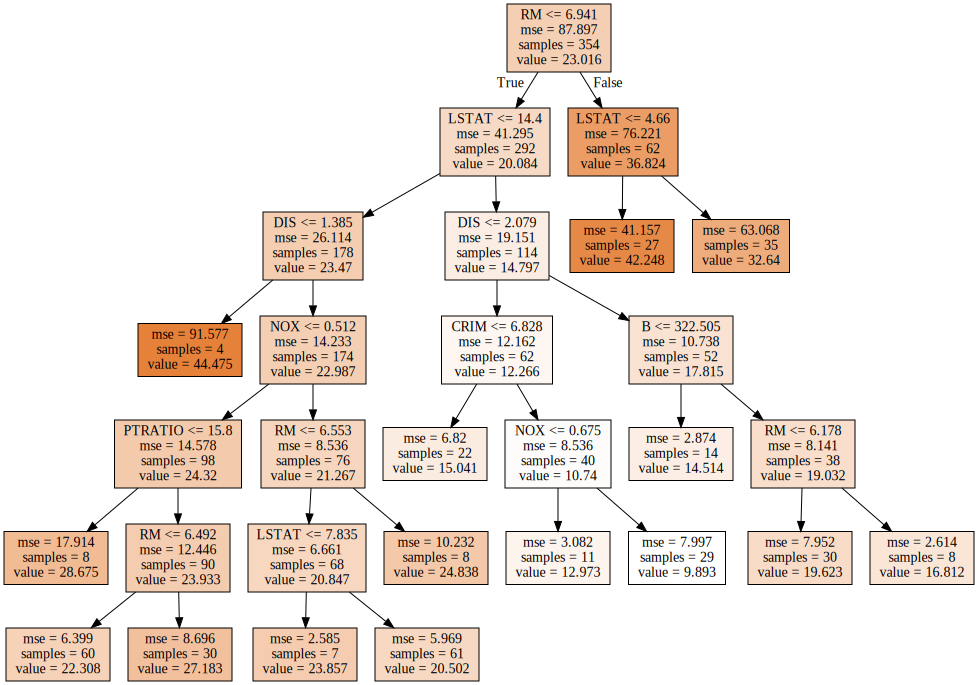

In [66]:
decision_tree = tree.export_graphviz(reg_final,feature_names=x_train.columns,filled=True)
graphviz.Source(decision_tree,format='png')

## via text representation

In [57]:
decision_tree = tree.export_graphviz(reg_final,feature_names=x_train.columns,max_depth=2,filled=True)

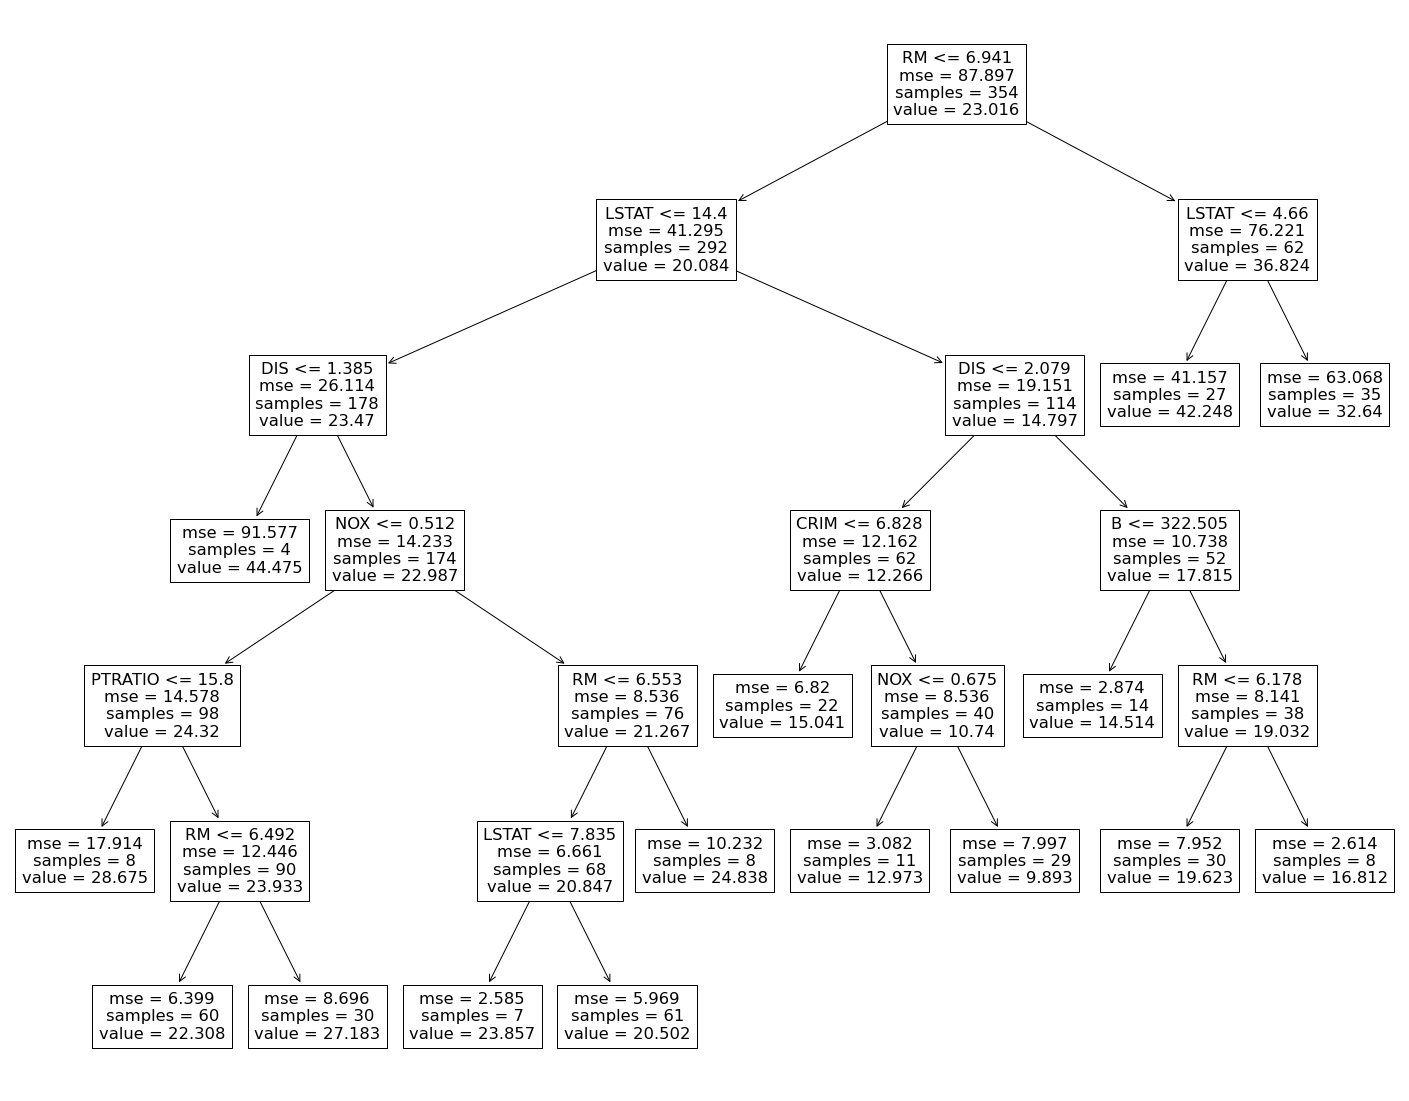

In [60]:
text_representation = tree.export_text(reg_final)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg_final, 
                   feature_names=x_train.columns)